# Stripe Connect - Merchant Behavioural Analysis

By Matthew, Data Analyst @ Tealbook, 2023

The purpose of this assignment is for Stripe's Interview Process for the role of Data Analyst within the Payment Team. 

This assignment was provided on 2023-11-04.

My contact information is

* Phone: 647-200-7444
* Email: matthewchang222@gmail.com
* Linkedin: https://www.linkedin.com/in/mc-2chang/
* Github: https://github.com/M2Chang

Stripe Connect allows users to integrate payments for their web/mobile platforms or marketplaces. It is Stripe's solution for businesses to process payments & payouts to sellers & service providers

In this analysis, the following questions will be answered:

1. Create an estimate for the amount of money we should expect to be paid out to each country on Jan 1, 2019
2. Assume that one year from the end of the dataset, we will have 
    * 15 platforms from the Eduation Industry, 
    * 5 from the Hotels, Resturants & Leisure, and 
    * 40 from Food & Beverage. 
    
    How much total payout do you expect to see on a typical day in 2019, from these industries?

3. Given this data, what metrics would you define and track in order to help product and business teams understand the progress and behavior of Stripe Connect?

### Datasets

Payout.csv: Contains daily payout amounts in cents, from platforms to recipients. Platforms and recipients are represented by a merchant_id
* date (`timestamp`): date of transaction (payout) from platform_id (merchant) to recipient_id. Encoded in "`YYYY-MM-DD`"
* platform_id (`string`): SHA256 id unique identifier for platform (merchant).
* recipient_id (`string`): SHA256 id unique identifier for recipient
* count(`int`): count the number of transactions for each platform
* amount (`float`): total payout from merchant to recipient in cents

Countries.csv: Maps merchants to countries 
* merchant_id (`string`): SHA256 id unique idenifier for merchant
* country (`string`)

Industries.csv: Maps merchants to industries 
* merchant_id (`string`): SHA256 id unique identifier for merchant
* industry (`string`)


![check](./Stripe-Data.png)

## Import the Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mticker
import squarify


In [41]:
#Import the data files into dataframes
countries_df = pd.read_excel("countries.xlsx")
industries_df = pd.read_excel("industries.xlsx")
payouts_df = pd.read_csv("payouts.csv")

# Exploratory Data Analysis

Going through each dataset individually to better understand the contents and the structure of each file

### Countries EDA

In [42]:
#Understanding the base structure of this file
countries_df

,merchant_id,country
0,id_ace715763434d4fd4eda58c9e9d692c6,FR
1,id_717b4a0f74912f18146c0708b330a3d9,US
2,id_671fd54bccd294b502fea89c0cc5a690,US
3,id_d8ed94b4e446b868e38efa8efa34b702,FR
4,id_1a054e523cbf203b16b38fc3e5b19b25,US
...,...,...
112304,id_2175f249ec28ef37248d77248b0f21f8,BE
112305,id_caf14bef6231d0d9dbf86404374b59f7,DE
112306,id_92facd7d913a2b208b632eb0ad0beca5,BE
112307,id_c38b5568c0f7b1f9f5306d9a9b8ee03b,US


In [43]:
#Checking to see how many counts of ID for each country to visually understand which country is the most popular

country_counts = countries_df.groupby(by='country').count().sort_values(by='merchant_id', ascending=False)
country_counts

,merchant_id
country,
US,59789
FR,26151
HK,5156
GB,3174
ES,2923
DE,2770
BE,2648
JP,2365
CA,1573


Text(0, 0.5, 'Country')

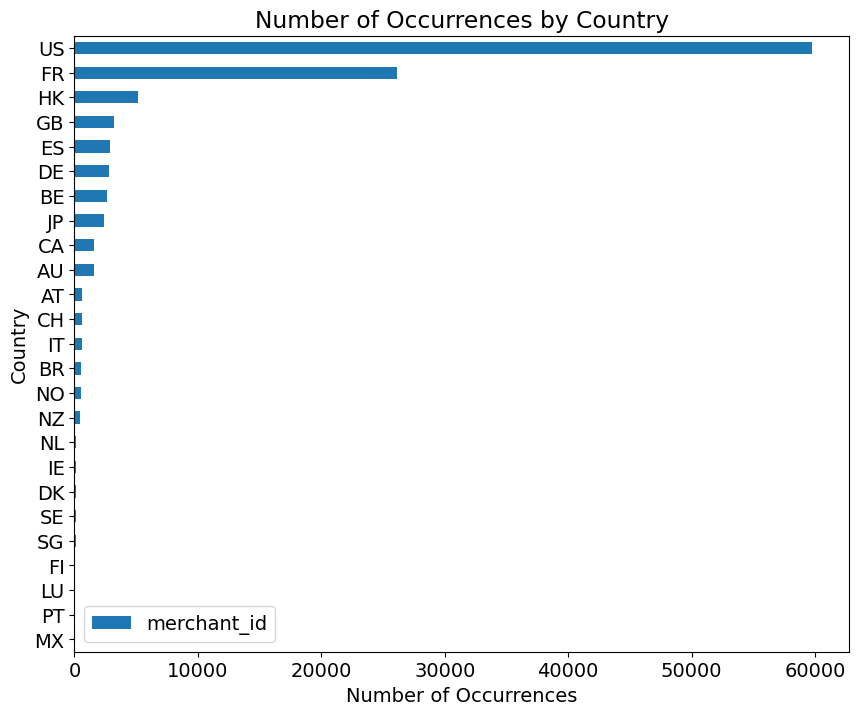

In [44]:
#Plotting the countries for better visualization of the table
country_counts = (countries_df.groupby('country')
                               .count()
                               .sort_values(by='merchant_id', ascending=True))  

#A horizontal bar graph helps easily visualize and compare each country
country_counts.plot(kind='barh', figsize=(10, 8))

#Adding some labels
plt.title('Number of Occurrences by Country')
plt.xlabel('Number of Occurrences')
plt.ylabel('Country')

### Country Analysis

Based on the comparsion, "US" has 50% lead compared to "FR", therefore we will focus on the US for our analysis within this workbook

Text(0.5, 1.0, 'Number of Occurrences by Country')

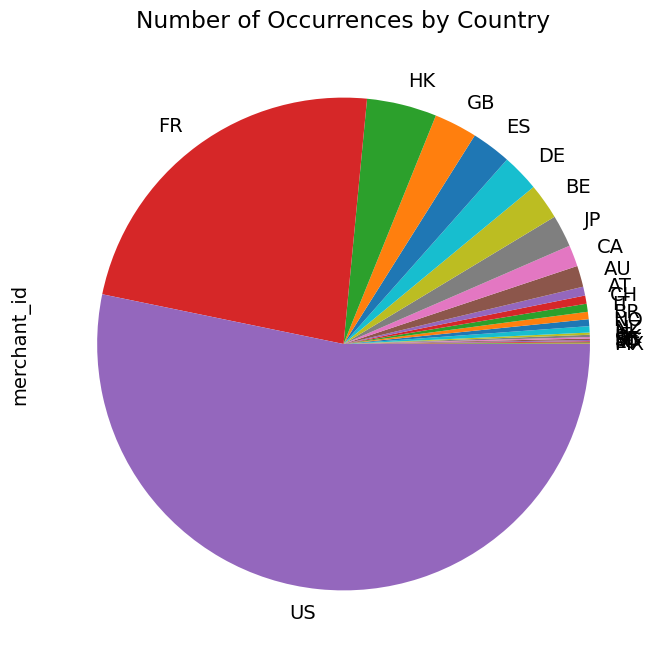

In [45]:
#Plotting the countries table in another form of visualization 

countries_df.groupby(by='country').count().sort_values(by='merchant_id').plot.pie(subplots=True, figsize=(8,8), legend=False)

plt.title('Number of Occurrences by Country')

### Industries EDA

In [46]:
#Understanding the structure of the industry file
industries_df

,merchant_id,industry
0,id_ace715763434d4fd4eda58c9e9d692c6,Travel & Hospitality
1,id_717b4a0f74912f18146c0708b330a3d9,Food & Beverage
2,id_671fd54bccd294b502fea89c0cc5a690,Professional Services (non-medical)
3,id_d8ed94b4e446b868e38efa8efa34b702,Travel & Hospitality
4,id_1a054e523cbf203b16b38fc3e5b19b25,Professional Services (non-medical)
...,...,...
112304,id_2175f249ec28ef37248d77248b0f21f8,Travel & Hospitality
112305,id_caf14bef6231d0d9dbf86404374b59f7,Travel & Hospitality
112306,id_92facd7d913a2b208b632eb0ad0beca5,Professional Services (non-medical)
112307,id_c38b5568c0f7b1f9f5306d9a9b8ee03b,"Tickets: concerts,sports,movies,conventions"


In [47]:
#Checking to see how many counts of ID for each type of industry to understand which is the most popular industry

industry_count = industries_df.groupby(by='industry').count().sort_values(by='merchant_id', ascending=False)
industry_count

,merchant_id
industry,
Other Software & Content,26037
Travel & Hospitality,18370
Other Services,15902
Professional Services (non-medical),14527
Food & Beverage,12221
Non-profit,9269
"Tickets: concerts,sports,movies,conventions",8081
Content,4730
Education,1010


Text(0, 0.5, 'Indudstry')

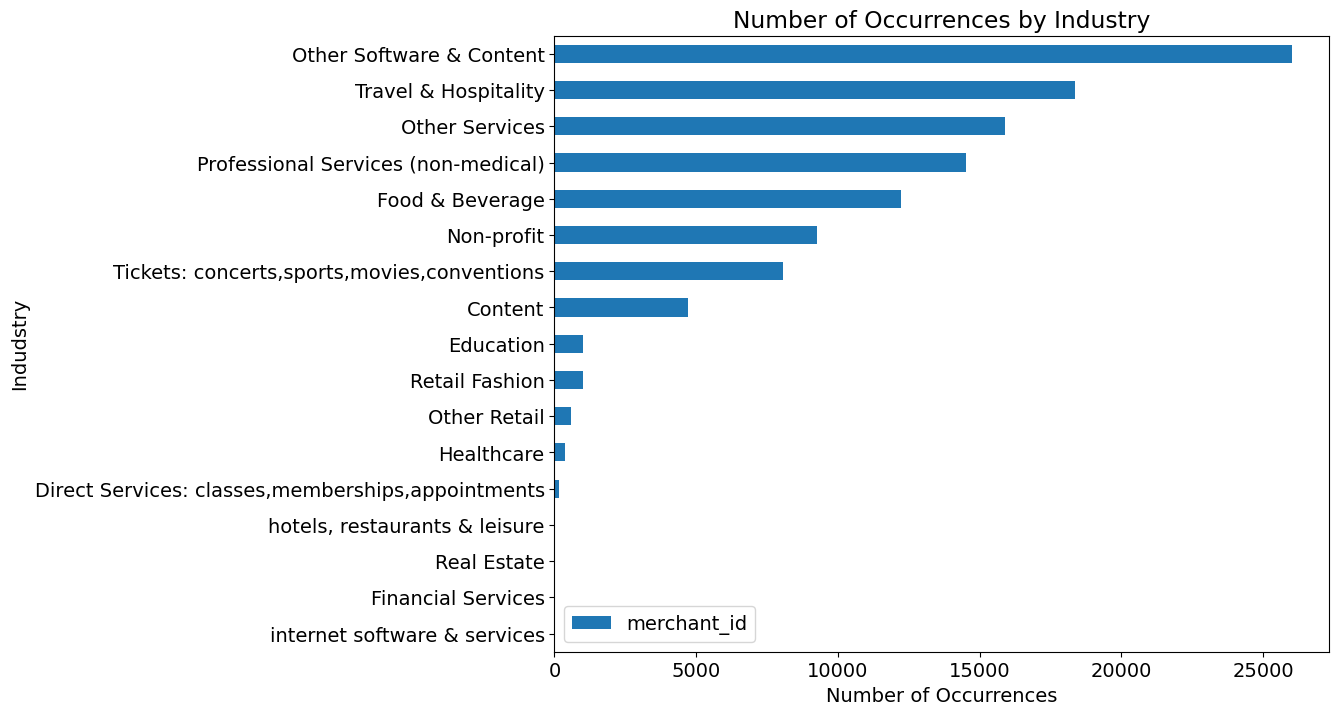

In [48]:
#Plotting the industries to visually understand which industry are the most popular
industry_count = (industries_df.groupby('industry')
                               .count()
                               .sort_values(by='merchant_id', ascending=True))  

#A horizontal bar graph helps easily visualize and compare each country
industry_count.plot(kind='barh', figsize=(10, 8))

#Adding some labels
plt.title('Number of Occurrences by Industry')
plt.xlabel('Number of Occurrences')
plt.ylabel('Indudstry')

### Payout EDA

In [49]:
#Undestanding the data structure of the payout files

#Assumptions made on the data
# 1. Platform_id - The ID of the user that is sending the money
# 2. Recipient_id - The ID of the user that is recieving the money
# 3. Count - The number of transactions done between the platform and recipient 

payouts_df

,date,platform_id,recipient_id,count,amount
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.0
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.0
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.0
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.0
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.0
...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.0
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.0
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.0
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.0


In [50]:
#Combining all the files into 1 analysis dataframe

#Joining together the payouts and the industry+country files to determine the dimensions of the senders
platform_payouts_df = payouts_df.merge(countries_df, left_on = 'platform_id', right_on= 'merchant_id', how ='left')
platform_payouts_df = platform_payouts_df.merge(industries_df, left_on= 'platform_id', right_on= 'merchant_id', how ='left')

desired_columns = ['date', 'platform_id', 'recipient_id', 'count', 'amount', 'country',  'industry']

platform_payouts_df = platform_payouts_df[desired_columns]

#Joining together the payouts and the industry+country files to determine the dimensions of the recipients 
platform_payouts_df = platform_payouts_df.merge(countries_df, left_on= 'recipient_id', right_on='merchant_id', how='left')
platform_payouts_df = platform_payouts_df.merge(industries_df, left_on= 'recipient_id', right_on='merchant_id', how='left')

desired_columns2 = ['date', 'platform_id', 'recipient_id', 'count', 'amount', 'country_x','industry_x', 'country_y', 'industry_y']

full_combo_df = platform_payouts_df[desired_columns2]

#Remaining the columns to better understand which dimensions belong to which type of user
full_combo_df.rename(columns={'country_x': 'platform_country' , 'industry_x' : 'platform_industry' , 'country_y' : 'recipient_country', 'industry_y': 'recipient_industry'}, inplace=True)

full_combo_df


C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\99751242.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_combo_df.rename(columns={'country_x': 'platform_country' , 'industry_x' : 'platform_industry' , 'country_y' : 'recipient_country', 'industry_y': 'recipient_industry'}, inplace=True)


,date,platform_id,recipient_id,count,amount,platform_country,platform_industry,recipient_country,recipient_industry
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.0,US,"Tickets: concerts,sports,movies,conventions",US,"Tickets: concerts,sports,movies,conventions"
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.0,NL,Travel & Hospitality,FR,Other Software & Content
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.0,DE,Content,GB,Content
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.0,US,Non-profit,US,Non-profit
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.0,US,Non-profit,US,Non-profit
...,...,...,...,...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.0,US,"Tickets: concerts,sports,movies,conventions",US,"Tickets: concerts,sports,movies,conventions"
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.0,JP,Other Services,JP,Other Services
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.0,US,Food & Beverage,US,Food & Beverage
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.0,US,Education,US,Education


In [51]:
#Creating a group DF for another view of the data
grouped_df = full_combo_df.sort_values('date').groupby(['platform_country', 'date']).sum()

grouped_df

platform_id  \
platform_country date                                                                           
AT               2018-05-06 00:00:00+00:00                id_d65f8564fe9c25d56db82b9a2abeddb5   
                 2018-05-07 00:00:00+00:00  id_d65f8564fe9c25d56db82b9a2abeddb5id_d65f8564...   
                 2018-05-08 00:00:00+00:00                id_d65f8564fe9c25d56db82b9a2abeddb5   
                 2018-05-09 00:00:00+00:00                id_d65f8564fe9c25d56db82b9a2abeddb5   
                 2018-05-10 00:00:00+00:00                id_d65f8564fe9c25d56db82b9a2abeddb5   
...                                                                                       ...   
US               2018-12-27 00:00:00+00:00  id_0b4bccb3fa3921227e997efd8f84fd88id_5dded1fc...   
                 2018-12-28 00:00:00+00:00  id_5dded1fc8ff3f8c0d96019076394d2a7id_5dded1fc...   
                 2018-12-29 00:00:00+00:00  id_5dded1fc8ff3f8c0d96019076394d2a7id_5dded1fc...   
                 2018-12-30 00:00:00+00:00  id_5dded1fc8ff3f8c0d96019076394d2a7id_5dded1fc...   
                 2018-12-31 00:00:00+00:00  id_5dded1fc8ff3f8c0d96019076394d2a7id_5dded1fc...   

                                                                                 recipient_id  \
platform_country date                                                                           
AT               2018-05-06 00:00:00+00:00                id_e105aec49be764792e90e8bf857f6eb3   
                 2018-05-07 00:00:00+00:00  id_74502caa74c6e9c2fcfe005378b9216did_9e1272f5...   
                 2018-05-08 00:00:00+00:00                id_f63d5166aca5b32464c10ff9bc4f19b1   
                 2018-05-09 00:00:00+00:00                id_e105aec49be764792e90e8bf857f6eb3   
                 2018-05-10 00:00:00+00:00                id_e248309fa8bbde2e69e25f93b530e8b6   
...                                                                                       ...   
US               2018-12-27 00:00:00+00:00  id_8ac6e9536f496c5660caecde3171832aid_fb532106...   
                 2018-12-28 00:00:00+00:00  id_2e25dc5fb64a275216a08fe83d38e11fid_a6c14467...   
                 2018-12-29 00:00:00+00:00  id_e593f0244e1499a7d7c51bd1dcd651d8id_792b1b88...   
                 2018-12-30 00:00:00+00:00  id_74f9a24d5667caeb8b1064de438ebc8aid_fce23eb8...   
                 2018-12-31 00:00:00+00:00  id_61ac497ae1e5fb0733fae2fcab6f5108id_aaec405e...   

                                            count       amount  \
platform_country date                                            
AT               2018-05-06 00:00:00+00:00      1       5893.0   
                 2018-05-07 00:00:00+00:00      4     118924.0   
                 2018-05-08 00:00:00+00:00      1      10262.0   
                 2018-05-09 00:00:00+00:00      1      31275.0   
                 2018-05-10 00:00:00+00:00      1      14592.0   
...                                           ...          ...   
US               2018-12-27 00:00:00+00:00   3811  282963475.0   
                 2018-12-28 00:00:00+00:00   2767  314390147.0   
                 2018-12-29 00:00:00+00:00   1662  219800921.0   
                 2018-12-30 00:00:00+00:00   3037  344028387.0   
                 2018-12-31 00:00:00+00:00   3295  377583800.0   

                                                                            platform_industry  \
platform_country date                                                                           
AT               2018-05-06 00:00:00+00:00                                     Retail Fashion   
                 2018-05-07 00:00:00+00:00  Retail FashionRetail FashionRetail FashionReta...   
                 2018-05-08 00:00:00+00:00                                     Retail Fashion   
                 2018-05-09 00:00:00+00:00                                     Retail Fashion   
                 2018-05-10 00:00:00+00:00                                     Retail Fashion   
...                 

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\2100343465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])
C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\2100343465.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_to_plot.reset_index(), x='date', y='amount', ci=None)


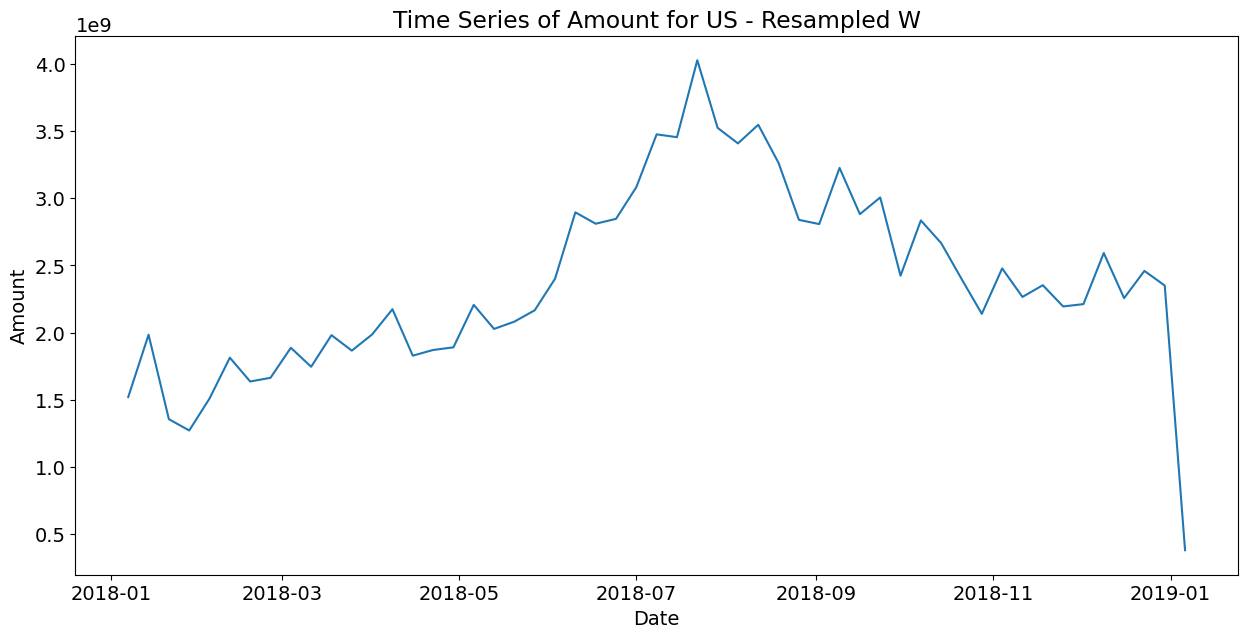

In [52]:
#Filter on specific countries within the dataset to understand how each country can differ
country = 'US' 

# Ensure 'date' is a datetime type if it's not already
full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])

# Filter the DataFrame for the selected country

country_df = full_combo_df[full_combo_df['platform_country'] == country]
country_df.set_index('date', inplace=True)

#Resampling the ammount to ensure we can see trends based on specific time periods
daily_totals = country_df['amount'].resample('D').sum()
weekly_totals = country_df['amount'].resample('W').sum()
monthly_totals = country_df['amount'].resample('M').sum()
quarterly_totals = country_df['amount'].resample('Q').sum()

#Choosing which frequency to analyze 
frequency = 'W'
if frequency == 'W':
    data_to_plot = weekly_totals
elif frequency == 'M':
    data_to_plot = monthly_totals
elif frequency == 'Q':
    data_to_plot = quarterly_totals
elif frequency == 'D':
    data_to_plot = daily_totals

# Plot the data
plt.figure(figsize=(15, 7))
sns.lineplot(data=data_to_plot.reset_index(), x='date', y='amount', ci=None)

# Add title and labels
plt.title(f'Time Series of Amount for {country} - Resampled {frequency}')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.show()

## Analysis of Payouts - Trends

Within the dataset, it contains transactions and their corresponding amount values over time. Therefore a time series analysis can be utilized to discover any underlying trends.

The date values were grouped weekly, and the amounts were aggregated based on each week. This approach offered a clear visualization of the changes in amounts over time.

Initial observations showcases there was trend upwards from the beginning of 2018. It continued to trend upwards until it reached its peak around July-August 2018. The months beyond August 2018, a gradual decline in amounts happened for the rest of the year.

The most significant outlier in the graph appeared around the end of 2018 and the start of 2019, a sudden drop in amounts. This type of decline could likely be attributed to external factors. My hypothesis is that the holiday season is over, so consumers are spending less time buying new products as most of their shopping was done before the holidays. 

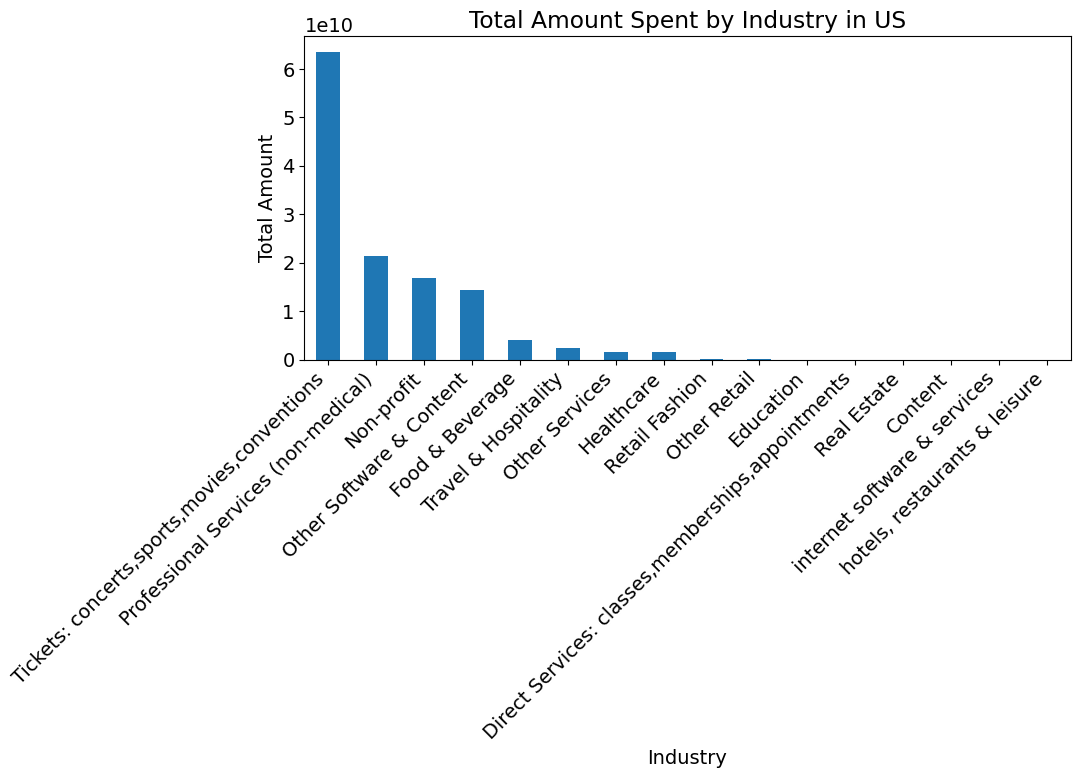

In [53]:
# Define the country you want to filter by
selected_country = 'US'  # Replace with the country you're interested in

# Filter the DataFrame for the selected country
filtered_df = full_combo_df[full_combo_df['platform_country'] == selected_country]

# Aggregate the total amount by industry for the filtered country
industry_amounts_by_country = filtered_df.groupby('platform_industry')['amount'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(11, 8)) 
industry_amounts_by_country.plot(kind='bar') 
plt.title(f'Total Amount Spent by Industry in {selected_country}') 
plt.xlabel('Industry') 
plt.ylabel('Total Amount')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


# Question 1 

In order to estimate the transaction amount for January 1 2019, I decided to utilize the Simple Moving Average methodology. The reason for this method was the observed fluctuation within the transaction data, as observed in the graph earlier. SMA smoothed out the trendline, mitigating the impact of short-term fluctuations. It provided a clearer view of the underlying trend over time. This appoarch simplified the trend, which allowed for more accurate prediction of the amount for Janurary 1 2019. The SMA, with its capacity to average out the dataset's noise, offers a solid foundation from which to predict the expected amount on the specified future date.

In [54]:
#Filter down on only columns required
SMA_DF = full_combo_df[['platform_country', 'date', 'count', 'amount']]

#Created this column to determine the average amount for each row
SMA_DF['average_amt'] = SMA_DF['amount']/SMA_DF['count']

SMA_DF.sort_values(by=['platform_country', 'date'])

SMA_DF

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\1015624758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMA_DF['average_amt'] = SMA_DF['amount']/SMA_DF['count']


,platform_country,date,count,amount,average_amt
0,US,2018-05-16 00:00:00+00:00,1,9786.0,9786.0
1,NL,2018-11-23 00:00:00+00:00,1,3750.0,3750.0
2,DE,2018-08-07 00:00:00+00:00,1,2258.0,2258.0
3,US,2018-07-10 00:00:00+00:00,1,20369.0,20369.0
4,US,2018-01-07 00:00:00+00:00,1,34922.0,34922.0
...,...,...,...,...,...
1622637,US,2018-08-02 00:00:00+00:00,1,26284.0,26284.0
1622638,JP,2018-12-18 00:00:00+00:00,1,8632.0,8632.0
1622639,US,2018-04-04 00:00:00+00:00,1,33243.0,33243.0
1622640,US,2018-07-19 00:00:00+00:00,1,11882.0,11882.0


C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\2694372205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMA_DF['date'] = pd.to_datetime(SMA_DF['date'])
C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\2694372205.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_to_plot.reset_index(), x='date', y='average_amt', ci=None)


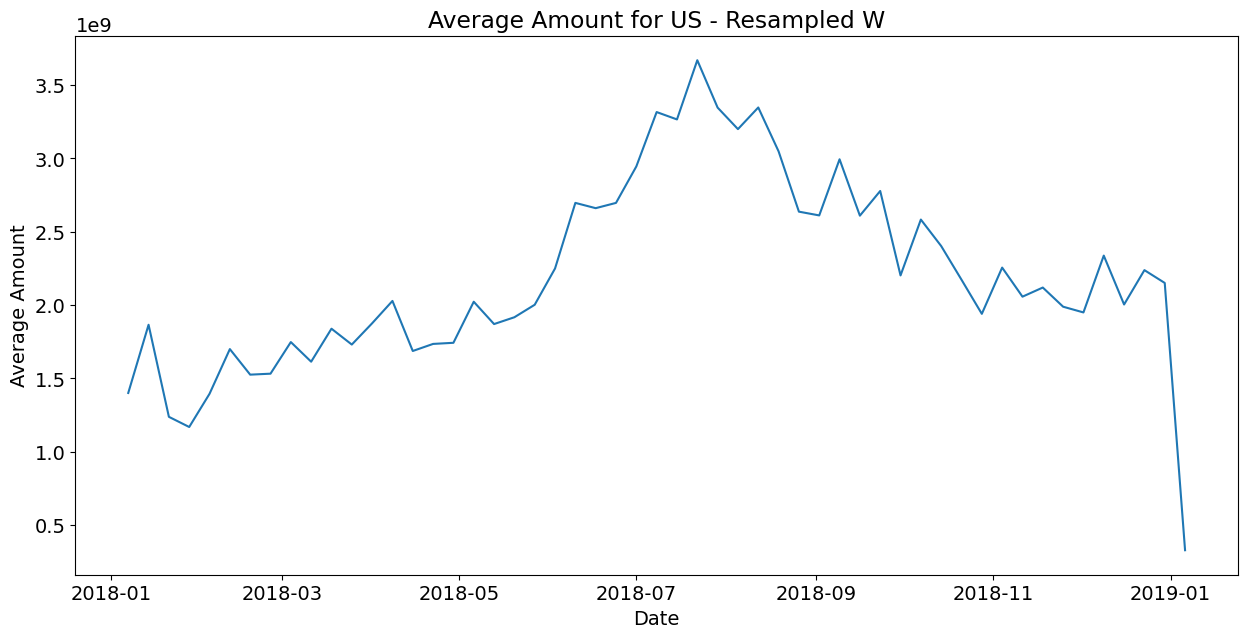

In [55]:
#Filter on specific countries within the dataset
country = 'US' 

# Ensure 'date' is a datetime type if it's not already
SMA_DF['date'] = pd.to_datetime(SMA_DF['date'])

# Filter the DataFrame for the selected country

country_df = SMA_DF[SMA_DF['platform_country'] == country]

country_df.set_index('date', inplace=True)

#Resampling the ammount to ensure we can see trends based on specific time periods
daily_totals = country_df['average_amt'].resample('D').sum()
weekly_totals = country_df['average_amt'].resample('W').sum()
monthly_totals = country_df['average_amt'].resample('M').sum()
quarterly_totals = country_df['average_amt'].resample('Q').sum()

#Choosing which frequency to analyze 
frequency = 'W'
if frequency == 'W':
    data_to_plot = weekly_totals
elif frequency == 'M':
    data_to_plot = monthly_totals
elif frequency == 'Q':
    data_to_plot = quarterly_totals
elif frequency == 'D':
    data_to_plot = daily_totals

# Plot the data
plt.figure(figsize=(15, 7))
sns.lineplot(data=data_to_plot.reset_index(), x='date', y='average_amt', ci=None)

# Add title and labels
plt.title(f'Average Amount for {country} - Resampled {frequency}')
plt.xlabel('Date')
plt.ylabel('Average Amount')

plt.show()

In [56]:
# Convert 'date' to datetime if it's not already and ensure it's in the right format
SMA_DF['date'] = pd.to_datetime(SMA_DF['date'])

# Define the list of countries
countries = ['US', 'NL', 'DE', 'CA', 'HK', 'FR', 'JP', 'IE', 'GB', 'SE', 'BE',
             'BR', 'AU', 'IT', 'NZ', 'AT', 'ES', 'FI', 'DK', 'NO', 'CH',
             'LU', 'SG', 'PT', 'MX']

#Choosing a weekly interval gave the biggest picture of the data in order to accurate see the trends
window_size = 7

# Initialize an empty DataFrame to store the estimates for January 1, 2019
Estimate_countries_jan_1_2019_SMA = pd.DataFrame()

#Looping through the countries in order to obtain each value for January 1, 2019
for country in countries:
    if pd.notna(country): 
        filtered_df = SMA_DF[SMA_DF['platform_country'] == country].copy()
        #This time delta was added so it can be utilized to estimate for January 1 2019
        filtered_df['date'] = filtered_df['date'] + pd.Timedelta(days=1)

        # Group, sum, calculate SMA
        grouped_df = filtered_df.groupby(['date', 'platform_country']).sum()
        grouped_df['sma_average_amt'] = grouped_df['average_amt'].rolling(window=window_size, min_periods=1).mean()
        grouped_df = grouped_df.reset_index()

        # Extract the estimate for Jan 1, 2019
        estimate = grouped_df[grouped_df['date'] == '2019-01-01'][['date', 'platform_country', 'average_amt', 'sma_average_amt']]

        # Append the estimate for this country to the main DataFrame
        Estimate_countries_jan_1_2019_SMA = pd.concat([Estimate_countries_jan_1_2019_SMA, estimate])

# Reset index of the final DataFrame
Estimate_countries_jan_1_2019_SMA = Estimate_countries_jan_1_2019_SMA.reset_index(drop=True)

# Display the estimate DataFrame
Estimate_countries_jan_1_2019_SMA


C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\215183595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMA_DF['date'] = pd.to_datetime(SMA_DF['date'])


,date,platform_country,average_amt,sma_average_amt
0,2019-01-01 00:00:00+00:00,US,3.289125e+08,3.148966e+08
1,2019-01-01 00:00:00+00:00,NL,5.590570e+05,5.700161e+05
2,2019-01-01 00:00:00+00:00,CA,8.015000e+03,5.751935e+06
3,2019-01-01 00:00:00+00:00,FR,2.167256e+07,5.902638e+06
4,2019-01-01 00:00:00+00:00,JP,9.871360e+05,1.406544e+06
5,2019-01-01 00:00:00+00:00,IE,8.974070e+05,7.474209e+05
6,2019-01-01 00:00:00+00:00,GB,4.562500e+04,1.815393e+06
7,2019-01-01 00:00:00+00:00,BE,3.140340e+05,1.984167e+05
8,2019-01-01 00:00:00+00:00,BR,2.385140e+05,2.313137e+05
9,2019-01-01 00:00:00+00:00,AU,8.012000e+03,2.773169e+05


# Question 2

Each industry was analyzed seperately in order to correctly estimate the 2019 daily payout. My apporach involved the following steps:

1. Filtering the data
2. Determining the average for each payout
3. Averaging the total amount for the year



In [57]:
full_combo_df.to_csv('data.csv')

In [58]:
#Creating a grouped dataframe in order to analyze based on the specific date and industry\
grouped_df = full_combo_df.groupby(['date', 'platform_industry']).agg({
    'count': 'sum',  
    'amount': 'sum',  
}).reset_index() 

#Creating the average amount per transaction
grouped_df['avg_amount'] = grouped_df['amount']/grouped_df['count']

grouped_df

,date,platform_industry,count,amount,avg_amount
0,2018-01-01 00:00:00+00:00,Content,2,2681.0,1340.500000
1,2018-01-01 00:00:00+00:00,"Direct Services: classes,memberships,appointments",2,1692.0,846.000000
2,2018-01-01 00:00:00+00:00,Education,49,2447823.0,49955.571429
3,2018-01-01 00:00:00+00:00,Food & Beverage,53,1315883.0,24827.981132
4,2018-01-01 00:00:00+00:00,Healthcare,9,288496.0,32055.111111
...,...,...,...,...,...
4668,2018-12-31 00:00:00+00:00,Other Software & Content,952,96246134.0,101098.880252
4669,2018-12-31 00:00:00+00:00,Professional Services (non-medical),745,54133258.0,72662.091275
4670,2018-12-31 00:00:00+00:00,Retail Fashion,22,712996.0,32408.909091
4671,2018-12-31 00:00:00+00:00,"Tickets: concerts,sports,movies,conventions",1511,222196189.0,147052.408339


### Education

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\32327375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df['projected_payout'] = education_df['avg_amount'] * platform


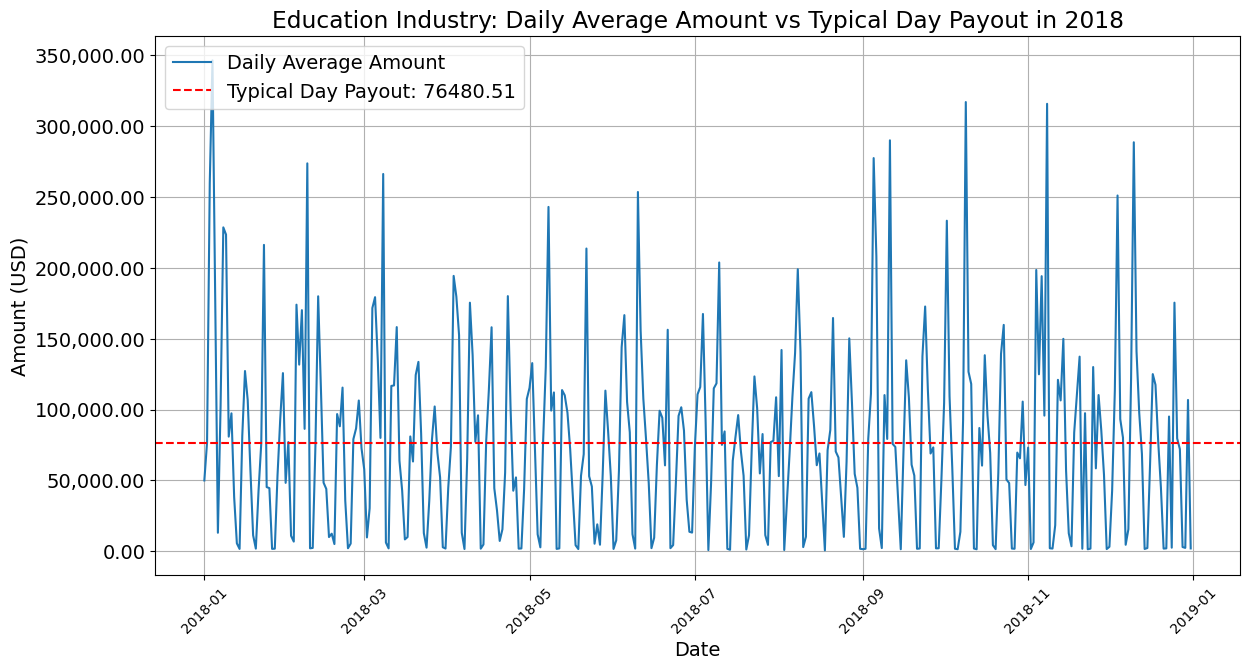

The expected total payout on a typical day in 2019 is: 76480.51


In [59]:
#Setting the specific platform number for each industry
platform = 15 
education_df = grouped_df[grouped_df['platform_industry'] == 'Education']

#Multiplying each amount based on number of platforms
education_df['projected_payout'] = education_df['avg_amount'] * platform

education_df.sort_values('date').groupby(pd.Grouper(key='date', freq='W')).sum()

#Determing the average amount for the entire 2018 year
typical_day_payout = education_df['avg_amount'].mean()
typical_day_payout = round(typical_day_payout, 2)



daily_education = education_df.sort_values('date').groupby('date').sum()

#Plotting the value to visualize the trend
plt.figure(figsize=(14, 7))

# Now plot the daily average amounts
daily_education = education_df.sort_values('date').groupby('date').sum()
plt.plot(daily_education.index, daily_education['avg_amount'], label='Daily Average Amount')

# Add a horizontal line for the typical day payout
plt.axhline(y=typical_day_payout, color='r', linestyle='--', label=f'Typical Day Payout: {typical_day_payout}')

# Improve label readability
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)

# Format y-axis to have a consistent number format
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

# Adjust the legend to not overlap with the data
plt.legend(loc='upper left')

# Add labels and title
plt.title('Education Industry: Daily Average Amount vs Typical Day Payout in 2018')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')

# Show grid for better readability of values
plt.grid(True)

# Show the plot
plt.show()

print(f"The expected total payout on a typical day in 2019 is: {typical_day_payout}")

### Education Analysis

The dataset contains 1,010 entries, providing a good sample size to accurately estimate the daily average for the year 2018. A throughout the year, the trend seems normal until a  notable deviation during July-August 2018. This period's marked surge in education-related transactions is likely attributable to the back-to-school season. Around this time is when parents and students typically invest in educational supplies in preparation for the new academic year.


### Hotels, Resturants & Leisure

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\3506585961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_R_L['projected_payout'] = hotel_R_L['avg_amount'] * platform


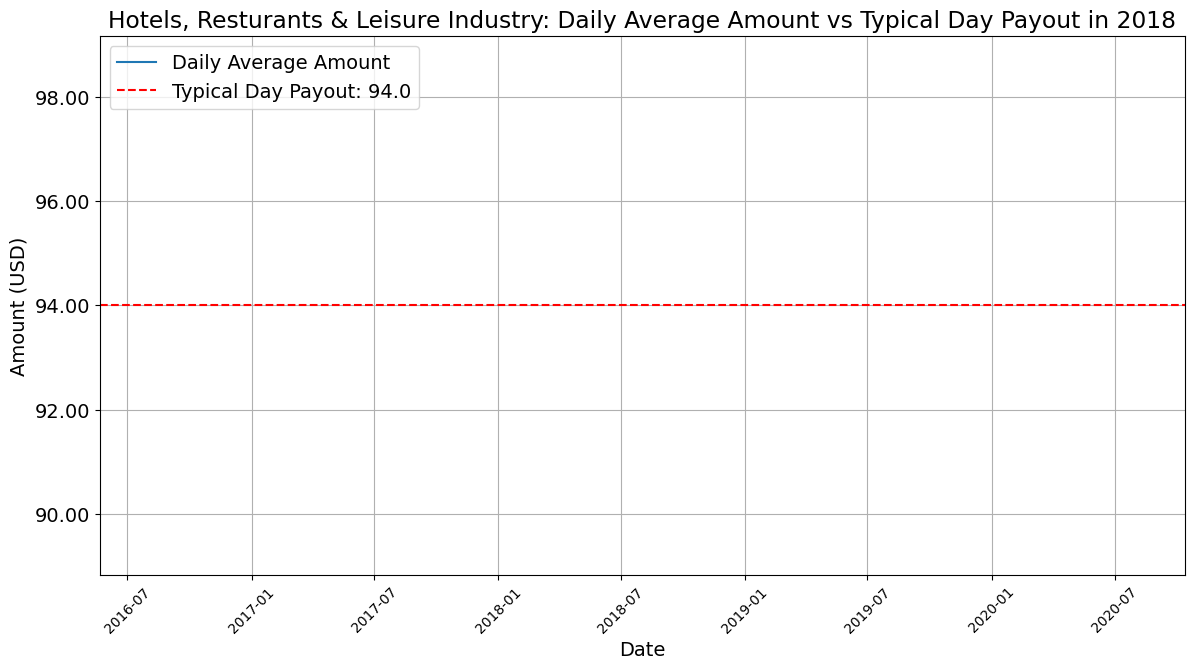

The expected total payout on a typical day in 2019 is: 94.0


In [60]:
#Setting the specific platform number for each industry
platform = 5
hotel_R_L = grouped_df[grouped_df['platform_industry'] == 'hotels, restaurants & leisure']

hotel_R_L['projected_payout'] = hotel_R_L['avg_amount'] * platform

hotel_R_L.sort_values('date').groupby(pd.Grouper(key='date', freq='W')).sum()

#Determing the average amount for the entire 2018 year
typical_day_payout = hotel_R_L['avg_amount'].mean()
typical_day_payout = round(typical_day_payout, 2)

# Now plot the daily average amounts
daily_hotel_R_L = hotel_R_L.sort_values('date').groupby('date').sum()

plt.figure(figsize=(14, 7))

# Now plot the daily average amounts
hotel_R_L = hotel_R_L.sort_values('date').groupby('date').sum()
plt.plot(hotel_R_L.index, hotel_R_L['avg_amount'], label='Daily Average Amount')

# Add a horizontal line for the typical day payout
plt.axhline(y=typical_day_payout, color='r', linestyle='--', label=f'Typical Day Payout: {typical_day_payout}')

# Improve label readability
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)

# Format y-axis to have a consistent number format
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

# Adjust the legend to not overlap with the data
plt.legend(loc='upper left')

# Add labels and title
plt.title('Hotels, Resturants & Leisure Industry: Daily Average Amount vs Typical Day Payout in 2018')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')

# Show grid for better readability of values
plt.grid(True)

# Show the plot
plt.show()

print(f"The expected total payout on a typical day in 2019 is: {typical_day_payout}")

### Hotels, Resturants & Leisure Analysis

The dataset features a single entry for the Hotels, Restaurants & Leisure sector. Therefore calculating an average amount for 2019 would be inaccurate due to the limited data. One possible reason for this could be the adoption rate of Stripe Connect in this industry. Many travel destinations and restaurants might prefer using their own proprietary systems or alternative service providers.


### Food & Beverages

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\3094216816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_bev_df['projected_payout'] = food_bev_df['avg_amount'] * platform


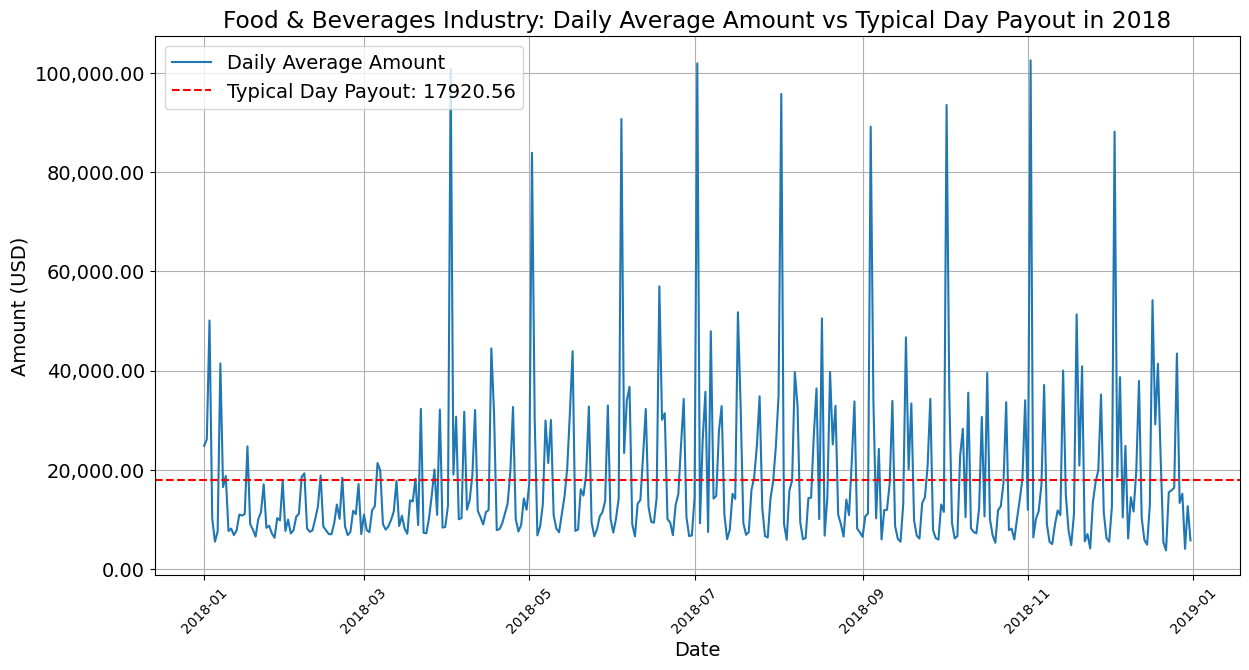

The expected total payout on a typical day in 2019 is: 17920.56


In [61]:
#Setting the specific platform number for each industry
platform = 40
food_bev_df = grouped_df[grouped_df['platform_industry'] == 'Food & Beverage']

food_bev_df['projected_payout'] = food_bev_df['avg_amount'] * platform

food_bev_df.sort_values('date').groupby(pd.Grouper(key='date', freq='W')).sum()

typical_day_payout = food_bev_df['avg_amount'].mean()
typical_day_payout = round(typical_day_payout, 2)

# Now plot the daily average amounts
food_bev_df = food_bev_df.sort_values('date').groupby('date').sum()

# Increase the figure size for better readability
plt.figure(figsize=(14, 7))

# Now plot the daily average amounts
food_bev_df = food_bev_df.sort_values('date').groupby('date').sum()
plt.plot(food_bev_df.index, food_bev_df['avg_amount'], label='Daily Average Amount')

# Add a horizontal line for the typical day payout
plt.axhline(y=typical_day_payout, color='r', linestyle='--', label=f'Typical Day Payout: {typical_day_payout}')

# Improve label readability
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)

# Format y-axis to have a consistent number format
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

# Adjust the legend to not overlap with the data
plt.legend(loc='upper left')

# Add labels and title
plt.title('Food & Beverages Industry: Daily Average Amount vs Typical Day Payout in 2018')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')

# Show grid for better readability of values
plt.grid(True)

# Show the plot
plt.show()

print(f"The expected total payout on a typical day in 2019 is: {typical_day_payout}")

In [71]:
# Convert the 'date' column to datetime format if it's not already
food_bev_df['date'] = pd.to_datetime(food_bev_df['date'])

# Set 'date' as the index
food_bev_df.set_index('date', inplace=True)

# Find the max 'amount' for each month
monthly_max = food_bev_df['amount'].resample('M').max()

# Reset the index if you want to turn the Series back into a DataFrame
monthly_max_df = monthly_max.reset_index()

monthly_max_df

,date,amount
0,2018-01-31 00:00:00+00:00,6008339.0
1,2018-02-28 00:00:00+00:00,6168765.0
2,2018-03-31 00:00:00+00:00,46134486.0
3,2018-04-30 00:00:00+00:00,72507312.0
4,2018-05-31 00:00:00+00:00,69184461.0
5,2018-06-30 00:00:00+00:00,60194555.0
6,2018-07-31 00:00:00+00:00,71816987.0
7,2018-08-31 00:00:00+00:00,68141096.0
8,2018-09-30 00:00:00+00:00,74051383.0
9,2018-10-31 00:00:00+00:00,85191590.0


### Food & Beverages

The Food & Beverage industry presents a substantial dataset with 12,221 data points, offering a large sample for analysis. Observing the daily transaction amounts, there is a notable high variability. This showcases an unpredictlable pattern in how many transactions are processed throghout the year. One main focus point would be the large spikes on certain days. This may have been caused by seasonal promotions or special events driving increased transaction volumes. I investigated the specific days these spikes could have occured. Most of them occur at the end of each month, therefore there must be some promotion happening during this time for the largest amount to occur during that time period. Despite these fluctuations, the daily payout maintains a remarkable level of consistency, suggesting a stable baseline for regular industry operations.

# Question 3

Based on the dataset, here are a few following metrics I believe tracking would help to better understand the behaviour of Stripe connect. 

1. Transaction Dynamics: By analyzing the volume of transactions, the total and average values transferred, we can offer the product team valuable insights into usage trends and the growth trajectory of Stripe Connect.

2. Geographical Performance: Identifying which countries are outperforming others in terms of transaction volume and value can help tailor regional strategies and understand market penetration.

3. Industry Performance: Examining the performance across different industries will reveal sector-specific strengths and opportunities, allowing for more targeted business approaches.

4. Transaction-Revenue Correlation: Investigating the relationship between the number of transactions and generated revenue will help in understanding the financial efficiency and profitability of the platform.

### POC - Transactions Dynamics

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\4083589914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])
C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\4083589914.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_to_plot.reset_index(), x='date', y='count', ci=None)


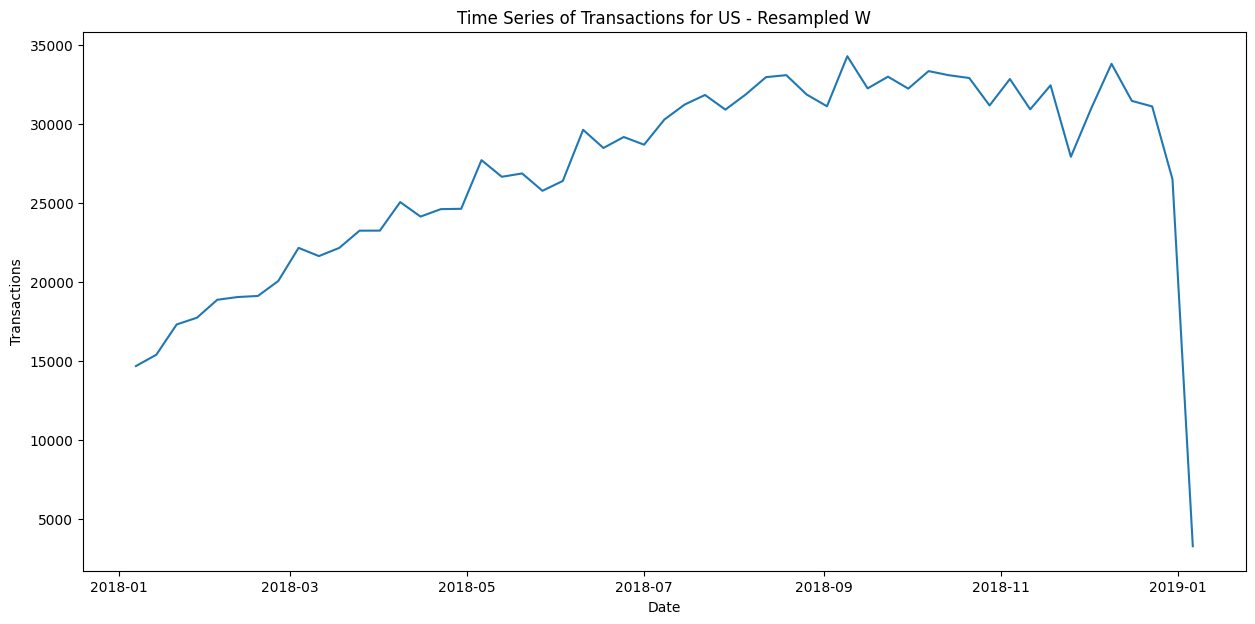

In [ ]:
#Filter on specific countries within the dataset to understand how each country can differ
country = 'US' 

# Ensure 'date' is a datetime type if it's not already
full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])

# Filter the DataFrame for the selected country

country_df = full_combo_df[full_combo_df['platform_country'] == country]
country_df.set_index('date', inplace=True)

#Resampling the ammount to ensure we can see trends based on specific time periods
daily_totals = country_df['count'].resample('D').sum()
weekly_totals = country_df['count'].resample('W').sum()
monthly_totals = country_df['count'].resample('M').sum()
quarterly_totals = country_df['count'].resample('Q').sum()

#Choosing which frequency to analyze 
frequency = 'W'
if frequency == 'W':
    data_to_plot = weekly_totals
elif frequency == 'M':
    data_to_plot = monthly_totals
elif frequency == 'Q':
    data_to_plot = quarterly_totals
elif frequency == 'D':
    data_to_plot = daily_totals

# Plot the data
plt.figure(figsize=(15, 7))
sns.lineplot(data=data_to_plot.reset_index(), x='date', y='count', ci=None)

# Add title and labels
plt.title(f'Time Series of Transactions for {country} - Resampled {frequency}')
plt.xlabel('Date')
plt.ylabel('Transactions')

plt.show()

#### POC - Transactions Dynamics - Summary

Overall there seems to be an large increase overtime in terms of the number of transactions, then suddenly there was a huge drop near the end of December. On a dashboard, if the marketing/product team notices it, an investigation can occur. The root cause can be determine to understand what factors may have caused this sudden drop of transactions. I believe it is due to the end of the holiday season, as people are concluding their holiday shopping for the year. 

### POC - Geographical Performance

![heatmap](./map.jpg)

#### POC - Geographical Performance Analysis 

The heatmap of country data provides a clear visual representation that can guide teams in discerning which nations are at low, medium, and high transaction levels. It's evident that the majority of countries fall on the lower end of the transaction spectrum when benchmarked against the USA. This poses a strategic decision point: whether to concentrate on expanding market presence and enhancing development efforts in countries with lower transaction volumes or to double down on reinforcing and capitalizing on the strong position in the USA.

### POC - Industry Performance Analysis 

In [ ]:
full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])

industry_perform_df = full_combo_df.groupby(['date', 'platform_industry']).sum()

industry_perform_df  = industry_perform_df.reset_index()

industry_perform_df = industry_perform_df[['date', 'platform_industry', 'count', 'amount']]

industry_perform_df

C:\Users\Matthew\AppData\Local\Temp\ipykernel_34916\1160851237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_combo_df['date'] = pd.to_datetime(full_combo_df['date'])


,date,platform_industry,count,amount
0,2018-01-01 00:00:00+00:00,Content,2,2681.0
1,2018-01-01 00:00:00+00:00,"Direct Services: classes,memberships,appointments",2,1692.0
2,2018-01-01 00:00:00+00:00,Education,49,2447823.0
3,2018-01-01 00:00:00+00:00,Food & Beverage,53,1315883.0
4,2018-01-01 00:00:00+00:00,Healthcare,9,288496.0
...,...,...,...,...
4668,2018-12-31 00:00:00+00:00,Other Software & Content,952,96246134.0
4669,2018-12-31 00:00:00+00:00,Professional Services (non-medical),745,54133258.0
4670,2018-12-31 00:00:00+00:00,Retail Fashion,22,712996.0
4671,2018-12-31 00:00:00+00:00,"Tickets: concerts,sports,movies,conventions",1511,222196189.0


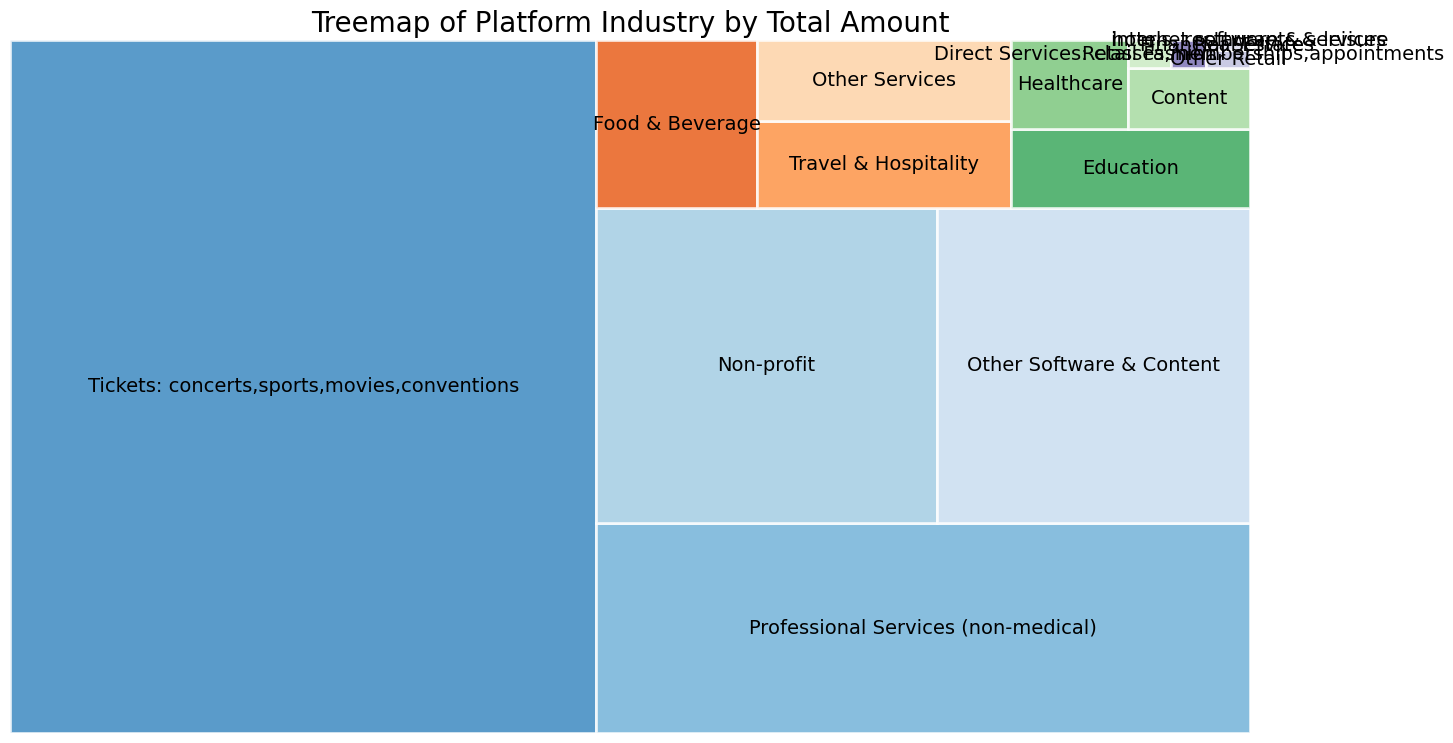

In [ ]:
# Aggregate data by industry
industry_totals = industry_perform_df.groupby('platform_industry')['amount'].sum().reset_index()

# Sort the DataFrame to ensure that larger blocks are positioned first
industry_totals = industry_totals.sort_values(by='amount', ascending=False)

# Improved color palette
colors = [plt.cm.tab20c(i/float(len(industry_totals))) for i in range(len(industry_totals))]

# Create a squarify plot
plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=industry_totals['amount'],  # Directly use the 'amount' column for sizes
    label=industry_totals['platform_industry'], 
    color=colors, 
    alpha=0.8,
    edgecolor="white", 
    linewidth=2
)

# Remove axes
plt.axis('off')

# Add a title with a larger font size
plt.title('Treemap of Platform Industry by Total Amount', fontsize=20)

# Improve label size based on your preference and the size of your segments
plt.rc('font', size=14)

# Show the plot with adjusted figure size
plt.show()

### POC - Industry Performance 

The treemap provides a comparative visualization that highlights the relative size and performance of various industries. The dominance of the top three sectors is immediately apparent, yet the presence of numerous smaller sectors suggests untapped potential. This presents the marketing and product teams with a strategic choice: to amplify their efforts in the already flourishing larger industries or to cultivate growth in the nascent smaller ones, potentially uncovering new opportunities for expansion.